In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('parkinsons.csv',sep=',')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
y=df.loc[: ,['status']];
X=df.drop('status',axis=1);
y.head()


,status
0,1
1,1
2,1
3,1
4,1


In [4]:
X.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
X=X.drop('name',axis=1);
Xnew = (X-X.min())/(X.max()-X.min())


#Xnew=pd.DataFrame(Xnew)
Xnew.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611


In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=20)
pca.fit(Xnew)



PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([  50.27,   66.61,   76.  ,   81.47,   86.5 ,   90.91,   93.86,
         95.63,   97.13,   98.48,   99.01,   99.45,   99.63,   99.79,
         99.87,   99.93,   99.97,   99.99,  100.  ,  100.  ])

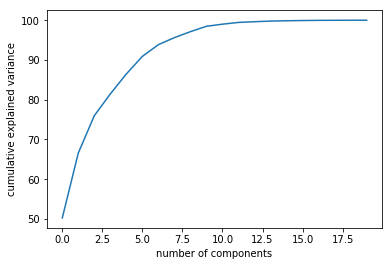

In [8]:
plt.plot(var1)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [9]:
pc=15
pca = PCA(n_components=pc)
pca.fit(Xnew)
Xnew=pca.fit_transform(Xnew)
print(Xnew)
print(Xnew.shape)
Xnew=pd.DataFrame(Xnew)

[[ 0.38301757 -0.27134553 -0.39023218 ...,  0.05005471 -0.07045622
  -0.04120762]
 [ 0.83283322 -0.09444878 -0.49262827 ...,  0.1742487  -0.07168366
  -0.02857648]
 [ 0.65794952 -0.15210079 -0.54429652 ...,  0.1020045  -0.08853806
  -0.03135497]
 ..., 
 [ 0.01491137  0.22975589  0.22377524 ..., -0.25337685  0.0638564
  -0.10220037]
 [-0.18110879  0.27376172  0.40016444 ..., -0.13845112 -0.11136741
  -0.16725465]
 [-0.22988231  0.18502024  0.34143232 ..., -0.09650683 -0.09344676
  -0.0177407 ]]
(195, 11)


In [10]:
Xnewcp=1-Xnew

In [11]:
Xnewcp.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.616982,1.271346,1.390232,0.893453,0.886279,1.241899,1.020993,0.964028,0.949945,1.070456,1.041208
1,0.167167,1.094449,1.492628,1.132598,0.867123,1.204646,0.968741,1.021328,0.825751,1.071684,1.028576
2,0.342050,1.152101,1.544297,0.994001,0.853974,1.105824,1.006156,1.028696,0.897995,1.088538,1.031355
3,0.272163,1.157592,1.511432,1.057091,0.816383,1.140158,1.004544,1.038224,0.827888,1.095376,1.035667
4,0.046148,1.061909,1.628521,0.884164,0.938472,1.131377,1.011430,0.919131,0.705290,1.058015,0.994736


In [12]:
X=[Xnew,Xnewcp]
X=pd.concat(X,axis=1)
X.shape

(195, 22)

In [13]:
p=0.5
alpha=0.0000002
number=2
count=0
i=1
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1,2,3,4,5,6,7,8,9,10
0,0.383018,-0.271346,-0.390232,0.106547,0.113721,-0.241899,-0.020993,0.035972,0.050055,-0.070456,...,1.271346,1.390232,0.893453,0.886279,1.241899,1.020993,0.964028,0.949945,1.070456,1.041208
1,0.832833,-0.094449,-0.492628,-0.132598,0.132877,-0.204646,0.031259,-0.021328,0.174249,-0.071684,...,1.094449,1.492628,1.132598,0.867123,1.204646,0.968741,1.021328,0.825751,1.071684,1.028576
2,0.657950,-0.152101,-0.544297,0.005999,0.146026,-0.105824,-0.006156,-0.028696,0.102005,-0.088538,...,1.152101,1.544297,0.994001,0.853974,1.105824,1.006156,1.028696,0.897995,1.088538,1.031355
3,0.727837,-0.157592,-0.511432,-0.057091,0.183617,-0.140158,-0.004544,-0.038224,0.172112,-0.095376,...,1.157592,1.511432,1.057091,0.816383,1.140158,1.004544,1.038224,0.827888,1.095376,1.035667
4,0.953852,-0.061909,-0.628521,0.115836,0.061528,-0.131377,-0.011430,0.080869,0.294710,-0.058015,...,1.061909,1.628521,0.884164,0.938472,1.131377,1.011430,0.919131,0.705290,1.058015,0.994736


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
X=X_train
y=y_train
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1,2,3,4,5,6,7,8,9,10
38,-0.559240,0.163099,-0.269040,-0.114253,0.154962,0.071839,0.050197,0.000090,-0.056471,0.013438,...,0.836901,1.269040,1.114253,0.845038,0.928161,0.949803,0.999910,1.056471,0.986562,0.959499
31,-0.823586,0.298057,-0.214113,-0.096460,0.007057,0.146937,0.119372,-0.069894,-0.141554,-0.046957,...,0.701943,1.214113,1.096460,0.992943,0.853063,0.880628,1.069894,1.141554,1.046957,0.826458
173,-0.433870,-0.368923,-0.286583,0.154389,0.032618,-0.014538,-0.066988,-0.035562,0.060689,-0.065198,...,1.368923,1.286583,0.845611,0.967382,1.014538,1.066988,1.035562,0.939311,1.065198,1.044057
12,-0.560035,-0.061987,0.120785,0.062782,-0.140863,0.147504,-0.067945,-0.118750,0.136255,0.030713,...,1.061987,0.879215,0.937218,1.140863,0.852496,1.067945,1.118750,0.863745,0.969287,1.023016
109,0.070444,0.047865,0.062917,0.019380,0.092270,-0.187343,-0.055740,0.084850,-0.207539,-0.147747,...,0.952135,0.937083,0.980620,0.907730,1.187343,1.055740,0.915150,1.207539,1.147747,0.949119


In [16]:
X.shape

(136, 22)

In [17]:
for t in range(0,y.size):
    if(y.iloc[t,0]==0):
        b0=t
        break
print(b0)

1


In [18]:
for t in range(0,y.size):
    if(y.iloc[t,0]==1):
        b1=t
        break
print(b1)

0


In [19]:
def norm(X):
    sum=0
    for i in range(0,X.shape[0]):
        sum+=X[i]
    return sum
def Activation(AIi,Wj,alpha):
    te=np.ones(2*pc)
    for co in range(0,2*pc):
        te[co]=AIi[co] if AIi[co]<Wj[co] else Wj[co]
    te1=norm(te)
    te2=norm(Wj)
    t=(te1)/(alpha+te2)
    return t

In [20]:
def MF(I,Wj):
    te=np.ones(2*pc)
    for co in range(0,2*pc):
        te[co]=I[co] if I[co]<Wj[co] else Wj[co]
    te1=norm(te)
    te2=norm(I)
    return te1/te2

In [21]:
def update(Wk,I):
    te=np.ones(2*pc)
    Wn=np.ones(2*pc)
    for co in range(0,2*pc):
        te[co]=I[co] if I[co]<Wk[co] else Wk[co]
        Wn[co]=te[co]
    return Wn



In [22]:
W1=np.array([1])
print(W1)   
X=pd.DataFrame.as_matrix(X)
print(X)
print(X.shape)
X_test=pd.DataFrame.as_matrix(X_test)
y_test=pd.DataFrame.as_matrix(y_test)
y=pd.DataFrame.as_matrix(y)
print(y.shape)

[1]
[[-0.55924008  0.16309901 -0.26903985 ...,  1.05647121  0.986562
   0.95949948]
 [-0.82358613  0.2980565  -0.21411279 ...,  1.14155447  1.04695744
   0.82645759]
 [-0.43386973 -0.36892318 -0.28658323 ...,  0.93931098  1.06519756
   1.04405732]
 ..., 
 [ 0.03718253  0.1562016  -0.23484484 ...,  0.86540129  0.80633887
   1.04276132]
 [-0.32426381 -0.08220406 -0.21436439 ...,  1.09011267  0.82920585
   0.98525705]
 [ 2.25163717  0.65064646  0.28734746 ...,  0.93157332  1.00950408
   1.05717137]]
(136, 22)
(136, 1)


In [23]:
count0 = 0
count1 = 0
We=np.ones((1,2*pc),dtype=np.float)
We=np.delete(We,0,0)
Ci=np.array([1],dtype=np.float)
Ci=np.delete(Ci,0,0)
Tj=np.array([1],dtype=np.float)
Tj=np.delete(Tj,0,0)
ClusCount=0

def add(We,Ci,Tj,i):
    global ClusCount    
    We=np.append(We,np.zeros((1,2*pc)),axis=0)
    Ci=np.append(Ci,[0])
    for a in range(0,2*pc):
        We[ClusCount,a]=X[i,a]
        Ci[ClusCount]=y[i]
    ClusCount+=1
    Tj=np.append(Tj,[0])
    return We,Ci,Tj

def check_if_first(i):
    global count0
    global count1
    if y[i]==0 and count0==0:
        count0+=1
        return 1
    if y[i]==0 and count0!=0:
        return 0
    if y[i]==1 and count1==0:
        count1+=1
        return 1
    if y[i]==1 and count1!=0:
        return 0

def search(element,arr):
    for i in range(0,arr.size):
        if element==arr[i]:
            break
    return i
    


In [24]:
while count<3:    
    count+=1
    for i in range(0,136):
        
        if(check_if_first(i)==1):
            
            We,Ci,Tj=add(We,Ci,Tj,i)
        else:
            for a in range(0,ClusCount):
                Tj[a]=Activation(X[i,:],We[a,:],alpha)
                #print(Tj[a])
            Tk=np.sort(Tj)
            Tkr=np.flipud(Tk)
            
            for k in range(0,Tkr.size):
                k1=search(Tkr[k],Tj)
                mf=MF(X[i,:],We[k1,:])
                #print("mf=",mf)
                if mf>p and Ci[k1]==y[i]:
                    We[k1,:]=update(We[k1,:],X[i,:])
                    flag=1
                    break
                if mf>p and Ci[k1]!=y[i]:
                    p=mf+0.001
                    flag=0
                    continue
                if mf<p:
                    flag=0
                    continue
            if flag==1:
                continue
            if flag==0:
                We,Ci,Tj=add(We,Ci,Tj,i)
                continue
print("We=",We)
print("p=",p)

We= [[-0.71930055  0.16309901 -0.3578083  ...,  0.98930695  0.84631982
   0.93608149]
 [-0.95256221  0.2980565  -0.33180613 ...,  1.04072359  1.04695744
   0.82645759]
 [-0.43704524 -0.36892318 -0.28658323 ...,  0.93931098  0.96554753
   0.99670219]
 ..., 
 [ 0.17373617 -0.42373663 -0.31105509 ...,  0.94178483  1.13591344
   1.03747051]
 [ 0.26944919 -0.37115433  0.19390207 ...,  0.95368073  1.07156039
   0.95871108]
 [-0.47325391 -0.07425932  0.446386   ...,  0.86497476  0.71431018
   0.96490128]]
p= 0.965461719112


In [25]:
ClusCount

151

In [26]:
print(Ci)

[ 1.  0.  0.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.  0.
  1.  1.  1.  0.  1.  1.  0.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.  0.
  1.  1.  0.  1.  1.  1.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.
  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.
  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.
  0.  1.  1.  0.  1.  1.  0.]


In [27]:
print(Tj)

[ 0.44844157  0.45495714  0.46297733  0.48401416  0.48164193  0.46707574
  0.74212095  0.52942883  0.60221127  0.52381964  0.51458537  0.53926166
  0.57642758  0.4936555   0.45313014  0.48647137  0.51868448  0.50604783
  0.5987201   0.47521663  0.51048849  0.44167104  0.49242153  0.52504866
  0.54187777  0.45509434  0.50377766  0.51082386  0.57711569  0.50411794
  0.59210881  0.50217692  0.64190342  0.5154924   0.46724038  0.5032415
  0.4599669   0.47273837  0.64210541  0.57479672  0.51324182  0.52329903
  0.61568551  0.56730208  0.51109811  0.47255761  0.54684136  0.46069707
  0.55110549  0.51814928  0.46050367  0.52898145  0.50691711  0.47615295
  0.47810868  0.47024984  0.52460391  0.46722283  0.46292816  0.70344439
  0.46143191  0.47866815  0.45317103  0.47965079  0.49077826  0.42744398
  0.44719641  0.51110767  0.4898117   0.50802342  0.55199397  0.51231563
  0.46859587  0.46905455  0.52127262  0.52859869  0.52609649  0.46543981
  0.46127216  0.49126269  0.47789075  0.52068898  0.

In [28]:
print(We)
print(We.shape)
print(Tj.shape)

[[-0.71930055  0.16309901 -0.3578083  ...,  0.98930695  0.84631982
   0.93608149]
 [-0.95256221  0.2980565  -0.33180613 ...,  1.04072359  1.04695744
   0.82645759]
 [-0.43704524 -0.36892318 -0.28658323 ...,  0.93931098  0.96554753
   0.99670219]
 ..., 
 [ 0.17373617 -0.42373663 -0.31105509 ...,  0.94178483  1.13591344
   1.03747051]
 [ 0.26944919 -0.37115433  0.19390207 ...,  0.95368073  1.07156039
   0.95871108]
 [-0.47325391 -0.07425932  0.446386   ...,  0.86497476  0.71431018
   0.96490128]]
(151, 22)
(151,)


In [29]:
res=np.ones(Tj.shape,dtype=np.float)
cou=0
cou1=0
h=0

for i in range(0,136):
    for j in range(0,Tj.shape[0]):
        res[j]=Activation(X[i],We[j],alpha)
    q=np.argmax(res)
   
    if Ci[q]==y[i]:
        cou1+=1
    if y[i]==0:
        h+=1
    if y[i]==0 and Ci[q]==y[i]:
        cou+=1
print(cou/h)
print("Training Accuracy=",cou1*100/136,"%")

1.0
Training Accuracy= 100.0 %


In [30]:
res=np.ones(Tj.shape,dtype=np.float)
cou=0
cou1=0
h=0
for i in range(0,59):
    for j in range(0,Tj.shape[0]):
        res[j]=Activation(X_test[i],We[j],alpha)
    q=np.argmax(res)
    if Ci[q]==y_test[i]:
        cou1+=1
    if y_test[i]==0:
        h+=1
    if y_test[i]==0 and Ci[q]==y_test[i]:
        cou+=1
print(cou*100/h)
print("Test Accuracy=",cou1/0.59,"%")

100.0
Test Accuracy= 96.61016949152543 %
